In [1]:
%matplotlib inline
import pandas 
import seaborn
import scipy
import numpy
import matplotlib.pyplot as plt


In [2]:
def get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type):
    raw_data = pandas.read_excel(path,header=0)
    
    time=[]
    for i in range(num_time_points):
        time = time + [read_time_step*i]*num_area_labels
    raw_data['time'] = time
    raw_data['genotype'] = g*(len(raw_data)/num_area_labels)
    raw_data['area_label'] = range(1,(len(g)+1))*(len(raw_data)/num_area_labels)
    raw_data['line'] = line*(len(raw_data)/len(line))
    raw_data['data type'] = data_type*(len(raw_data)/len(data_type))

    
    return raw_data

def plot_timecourses(data):
        
    g = seaborn.FacetGrid(data,aspect=1,size=4,row='genotype',col='data type',sharey=False)
    g = g.map(seaborn.pointplot, 'time','Overall [cps]','area_label',join='True',palette='Reds')
    
    return g

def plot_timecourses_for_fig(data):
    seaborn.set(font_scale=1.75,font='sans-serif')
    seaborn.set_style('white')
    g = seaborn.FacetGrid(data,aspect=1,size=5,despine=True)
    g = g.map(seaborn.pointplot, 'time','Overall [cps]','genotypes',palette='Blues',join='True',scatter='False')
    g.set(xlabel='Time (minutes)',ylabel='Normalized Luciferase Signal')

    return g

def plot_normalized_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()

    for i in range(num_time_points):
        for j in range(num_plant_lines):
            x=temp2[((normalization_observation_number-1)*num_plant_lines)+j]
            temp1[j+i*num_plant_lines] = float(temp1[j+i*num_plant_lines] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    
    g2 = seaborn.FacetGrid(data_normalized,aspect=1,size=4)
    g2 = g2.map(seaborn.pointplot, 'time','Overall [cps]','genotype',palette='Blues').add_legend()
    
    return g2

def normalize_data_for_timecourses(data,normalization_observation_number,num_plant_lines,num_time_points,start_time,end_time):
    data_normalized = data
    temp1 = data['Overall [cps]'].tolist()
    temp2 = data['Overall [cps]'].tolist()

    for i in range(num_time_points):
        for j in range(num_plant_lines):
            x=temp2[((normalization_observation_number-1)*num_plant_lines)+j]
            temp1[j+i*num_plant_lines] = float(temp1[j+i*num_plant_lines] )/float(x)
        
    data_normalized['Overall [cps]'] = temp1
#     time_subtraction = data_normalized['time'].iloc[(normalization_observation_number-1)]
    
    data_normalized = data_normalized[(data_normalized['time']>(start_time-1))&(data_normalized['time']<(end_time+1))]
    
#     data_normalized['time'] = [(x-time_subtraction) for x in data_normalized['time']]
    
    return data_normalized

def find_time_to_max_foldchange(data,start_time,end_time,num_plant_lines,induction_time):
    
    data = data[(data['time']>(start_time-1))&(data['time']<(end_time+1))]
    num_time_points = len(data)/num_plant_lines
    time_max_fold_change = [0]*num_plant_lines
    max_fold_change = [0]*num_plant_lines
    
    for counter1 in range(num_plant_lines):
        compare_to = data['Overall [cps]'].iloc[counter1]
        for counter2 in range(num_time_points):
            if data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1] > compare_to:
                time_max_fold_change[counter1] = data['time'].iloc[(num_plant_lines*counter2)+counter1]-induction_time
                max_fold_change[counter1] = float(data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1])#/float(compare_to)
                compare_to = data['Overall [cps]'].iloc[(num_plant_lines*counter2)+counter1]
    
    line_analysis = pandas.DataFrame({'line':data[data['time']==start_time]['line'],'data type':data[data['time']==start_time]['data type'],'genotype':data[data['time']==start_time]['genotype'],'area_label':data.area_label.unique(),'Time to Max Fold change':time_max_fold_change,'Max Fold change':max_fold_change})
    
    return line_analysis

def plot_line_analysis(line_analysis):
    
    line_analysis['Max percent change post induction'] = [(x-1)*100 for x in line_analysis['Max Fold change']]
    seaborn.set(font_scale=1.75,font='sans-serif')
    seaborn.set_style('white')
    g1 = seaborn.FacetGrid(line_analysis,aspect=1,size=5,col='data type',despine=True)
    g1 = g1.map(seaborn.boxplot, 'background','Max percent change post induction',palette='Blues')
    g1 = g1.map(seaborn.swarmplot, 'background','Max percent change post induction','genotype',palette='YlOrRd').add_legend()
#     plt.suptitle('Max percent change post induction')
    
    g2 = seaborn.FacetGrid(line_analysis,aspect=1,size=5,col='data type',despine=True)
    g2 = g2.map(seaborn.boxplot, 'background','Time to Max Fold change',palette='Blues')
    g2 = g2.map(seaborn.swarmplot, 'background','Time to Max Fold change','genotype',palette='YlOrRd').add_legend()
#     plt.suptitle('Time to Max Change')

    
    return g1,g2
    
def plot_line_analysis_violin(line_analysis):
    
    line_analysis['Max percent change post induction'] = [(x-1)*100 for x in line_analysis['Max Fold change']]
    seaborn.set(font_scale=1.75,font='sans-serif')
    seaborn.set_style('white')
    g1 = seaborn.FacetGrid(line_analysis,aspect=1,size=5,despine=True)
    g1 = g1.map(seaborn.violinplot, 'data type','Max percent change post induction','genotype',split=True,palette='Blues').add_legend()
    
    g2 = seaborn.FacetGrid(line_analysis,aspect=1,size=5,despine=True)
    g2 = g2.map(seaborn.violinplot, 'data type','Time to Max Fold change','genotype',split=True,palette='Blues').add_legend()
    
    
    return g1,g2

In [3]:
#getting data

normalization_observation_number = 6
num_time_points = 42
start_time = 30
end_time = 500
induction_time=50

path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170713_ABS44 45_Andrew_collected.xlsx'
num_area_labels = 55
read_time_step = 10
num_time_points = 42
g = ['ABS45_3833']*16 + ['ABS44_3811']*15 + ['ABS44_3810']*15 + ['ABS45_3833']*3 + ['ABS44_3811']*3 + ['ABS44_3810']*3 
line = [1]*6 + [3]*5 + [2]*5 + [3]*5 + [2]*5 + [1]*5 + [2]*5 + [1]*5 + [3]*5 + [1,3,4,3,2,1,2,1,3]
data_type = ['Leaf']*46 + ['Whole plant']*9

data1 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)
data = data1
data1_norm = normalize_data_for_timecourses(data1,normalization_observation_number,num_area_labels,num_time_points,start_time,end_time)
data_norm  = data1_norm
analysis1 = find_time_to_max_foldchange(data1,start_time,end_time,num_area_labels,induction_time)
analysis = analysis1

path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170712_ABS44 vars_Andrew_collected.xlsx'
num_area_labels = 54
read_time_step = 10
num_time_points = 42
g = ['ABS44_4018']*15 + ['ABS44_3823']*15 + ['ABS44_4015']*15 + ['ABS44_4018']*3 + ['ABS44_3823']*3 + ['ABS44_4015']*3 
line = [3]*5 + [2]*5 + [4]*5 + [4]*5 + [2]*5 + [3]*5 + [2]*5 + [1]*5 + [4]*5 + [3,2,4,4,2,3,2,1,4]
data_type = ['Leaf']*45 + ['Whole plant']*9

data2 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)
data = data.append(data2)
data2_norm = normalize_data_for_timecourses(data2,normalization_observation_number,num_area_labels,num_time_points,start_time,end_time)
data_norm  = data_norm.append(data2_norm)
analysis2 = find_time_to_max_foldchange(data2,start_time,end_time,num_area_labels,induction_time)
analysis = analysis.append(analysis2)


path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170711_ABS46 3xgrna_Andrew_collected.xlsx'
num_area_labels = 48
read_time_step = 10
num_time_points = 42
g = ['ABS46_3807']*10 + ['ABS44_3823+3xgRNA']*10 +  ['ABS46_3807']*5 + ['ABS44_3823+3xgRNA']*15 +['ABS46_3807']*2 + ['ABS44_3823+3xgRNA']*2 +  ['ABS46_3807']*1 + ['ABS44_3823+3xgRNA']*3
line = [3]*5 + [4]*5 + [1]*5 + [3]*5 + [5]*5 + [4]*5 + [5]*5 + [2]*5 + [3,4,1,3,5,4,5,2]
data_type = ['Leaf']*40 + ['Whole plant']*8

data3 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)
data = data.append(data3)
data3_norm = normalize_data_for_timecourses(data3,normalization_observation_number,num_area_labels,num_time_points,start_time,end_time)
data_norm  = data_norm.append(data3_norm)
analysis3 = find_time_to_max_foldchange(data3,start_time,end_time,num_area_labels,induction_time)
analysis = analysis.append(analysis3)

path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170710_ABS45 46_Andrew_collected.xlsx'
num_area_labels = 54
read_time_step = 10
num_time_points = 42
g = ['ABS46_4130']*15 + ['ABS45_3804']*15 + ['ABS46_4145']*15 + ['ABS46_4130']*3 + ['ABS45_3804']*3 + ['ABS46_4145']*3 
line = [1]*5 + [2]*5 + [4]*5 + [4]*5 + [3]*5 + [2]*5 + [2]*5 + [4]*5 + [5]*5 + [1,2,4,4,3,2,2,4,5]
data_type = ['Leaf']*45 + ['Whole plant']*9

data4 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)
data = data.append(data4)
data4_norm = normalize_data_for_timecourses(data4,normalization_observation_number,num_area_labels,num_time_points,start_time,end_time)
data_norm  = data_norm.append(data4_norm)
analysis4 = find_time_to_max_foldchange(data4,start_time,end_time,num_area_labels,induction_time)
analysis = analysis.append(analysis4)

path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170709_ABS48 49_Andrew_collected.xlsx'
num_area_labels = 54
read_time_step = 10
num_time_points = 42
g = ['ABS48_4137']*15 + ['ABS49_3953']*15 + ['ABS49_4175']*15 + ['ABS48_4137']*3 + ['ABS49_3953']*3 + ['ABS49_4175']*3 
line = [3]*5 + [2]*5 + [1]*5 + [4]*5 + [5]*5 + [3]*5 + [5]*5 + [1]*5 + [2]*5 + [3,2,1,4,5,3,5,1,2]
data_type = ['Leaf']*45 + ['Whole plant']*9

data5 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)
data = data.append(data5)
data5_norm = normalize_data_for_timecourses(data5,normalization_observation_number,num_area_labels,num_time_points,start_time,end_time)
data_norm  = data_norm.append(data5_norm)
analysis5 = find_time_to_max_foldchange(data5,start_time,end_time,num_area_labels,induction_time)
analysis = analysis.append(analysis5)

path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170708_ABS44 48 49_Andrew_collected.xlsx'
num_area_labels = 54
read_time_step = 10
num_time_points = 42
g = ['ABS48_4131']*15 + ['ABS49_4174']*15 + ['ABS44_4125']*15 + ['ABS48_4131']*3 + ['ABS49_4174']*3 + ['ABS44_4125']*3 
line = [5]*5 + [2]*5 + [3]*5 + [1]*5 + [2]*5 + [3]*5 + [2]*5 + [5]*5 + [1]*5 + [5,2,3,1,2,3,2,5,1]
data_type = ['Leaf']*45 + ['Whole plant']*9

data6 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)
data = data.append(data6)
data6_norm = normalize_data_for_timecourses(data6,normalization_observation_number,num_area_labels,num_time_points,start_time,end_time)
data_norm  = data_norm.append(data6_norm)
analysis6 = find_time_to_max_foldchange(data6,start_time,end_time,num_area_labels,induction_time)
analysis = analysis.append(analysis6)

path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170706_ABS51_Andrew_collected.xlsx'
normalization_observation_number = 7 #because I switched out one of the plants pre induction

num_area_labels = 54
read_time_step = 10
num_time_points = 42
g = ['ABS51_3959']*15 + ['ABS51_3958']*15 + ['ABS51_3957']*15 + ['ABS51_3959']*3 + ['ABS51_3958']*3 + ['ABS51_3957']*3 
line = [4]*5 + [1]*5 + [3]*5 + [3]*5 + [4]*5 + [2]*5 + [1]*5 + [3]*5 + [4]*5 + [4,1,3,3,4,2,1,3,4]
data_type = ['Leaf']*45 + ['Whole plant']*9

data7 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)
data = data.append(data7)
data7_norm = normalize_data_for_timecourses(data7,normalization_observation_number,num_area_labels,num_time_points,start_time,end_time)
data_norm  = data_norm.append(data7_norm)
analysis7 = find_time_to_max_foldchange(data7,start_time,end_time,num_area_labels,induction_time)
analysis = analysis.append(analysis7)



C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(<seaborn.axisgrid.FacetGrid at 0x1601a908>,
 <seaborn.axisgrid.FacetGrid at 0x41f391d0>)

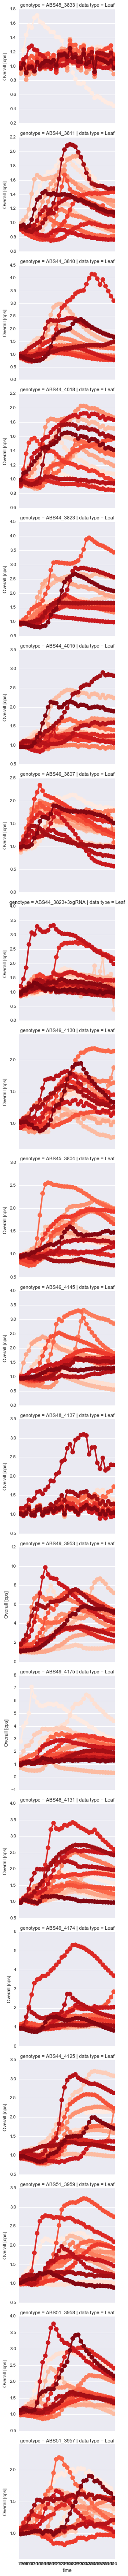

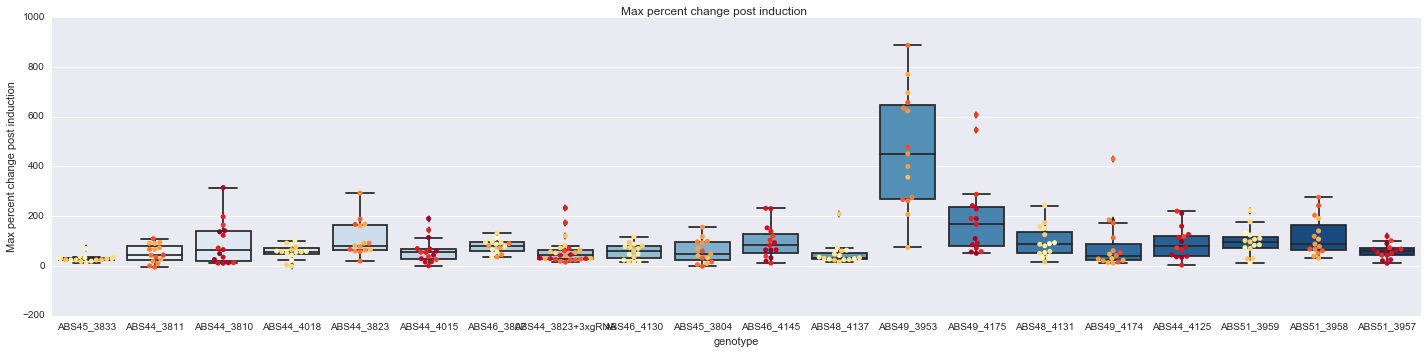

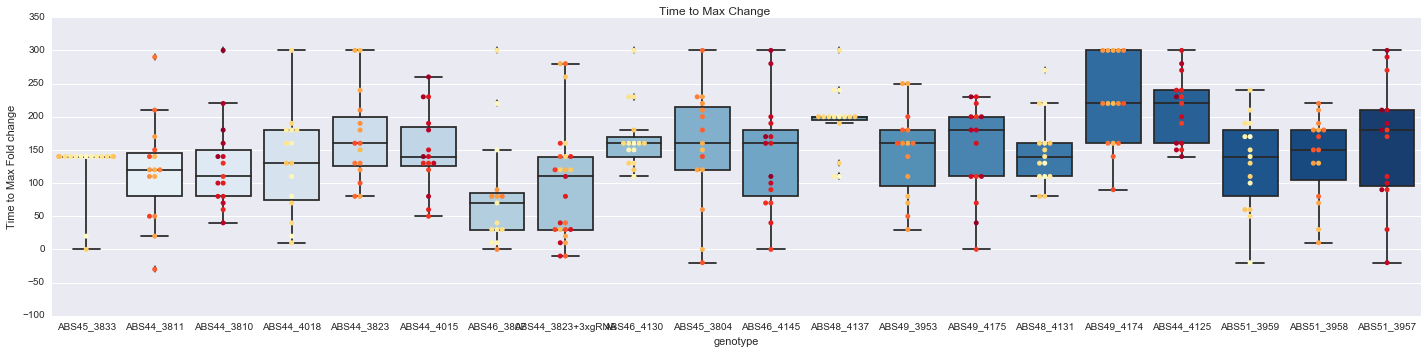

In [15]:
plot_timecourses(data_norm[data_norm['data type']=='Leaf'])
plot_line_analysis(analysis[analysis['data type']=='Leaf'])

C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(<seaborn.axisgrid.FacetGrid at 0x4e189b38>,
 <seaborn.axisgrid.FacetGrid at 0x3fc938d0>)

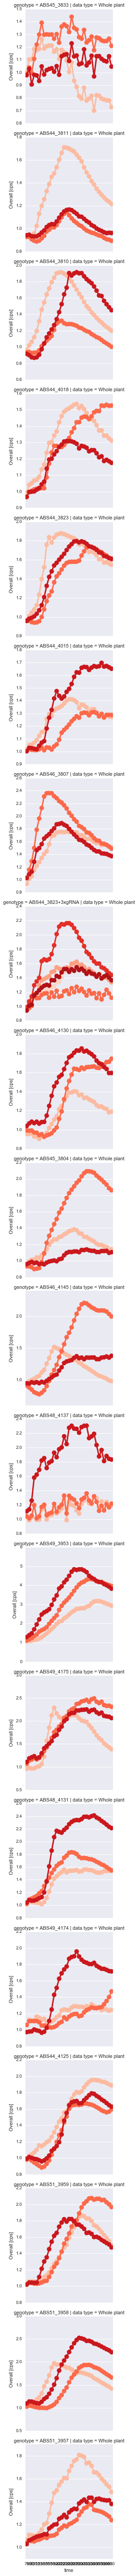

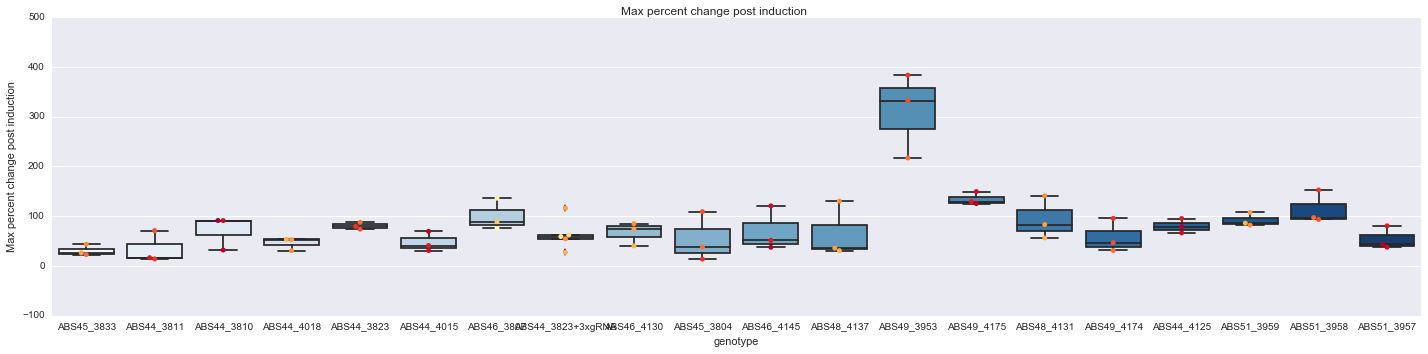

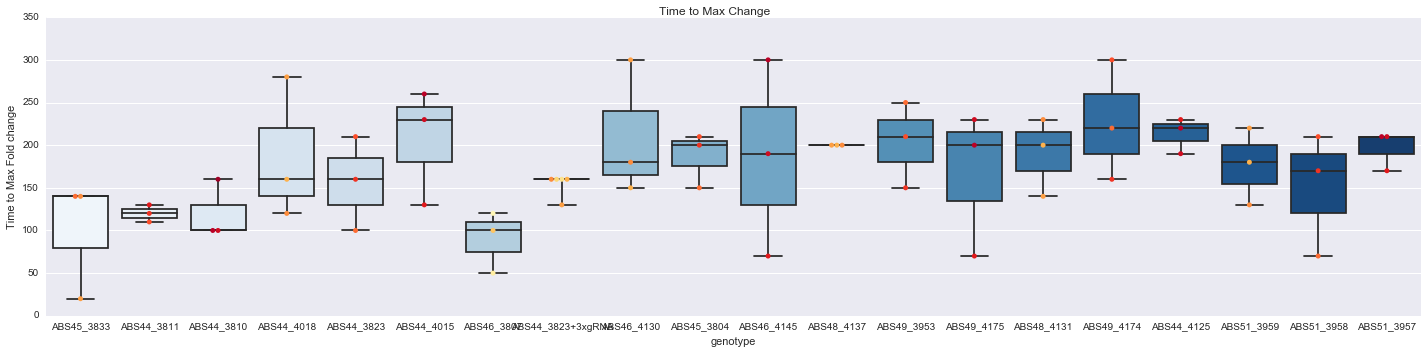

In [16]:
plot_timecourses(data_norm[data_norm['data type']=='Whole plant'])
plot_line_analysis(analysis[analysis['data type']=='Whole plant'])

C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Max percent change post induction: F_onewayResult(statistic=4.326328326954175, pvalue=0.044323077706420654)
Time to Max Fold change: F_onewayResult(statistic=13.185880739790429, pvalue=0.00082902746347168288)
Median Max percent change post induction ABS44: 81.6558598664
Median Max percent change post induction ABS44+3xgRNA: 57.3839662447


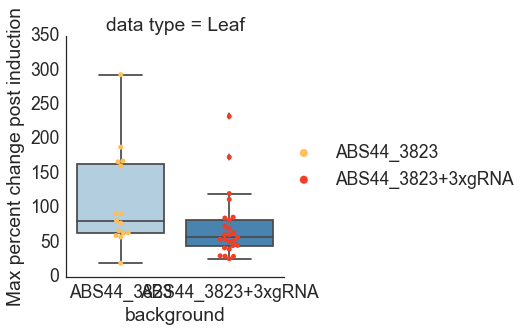

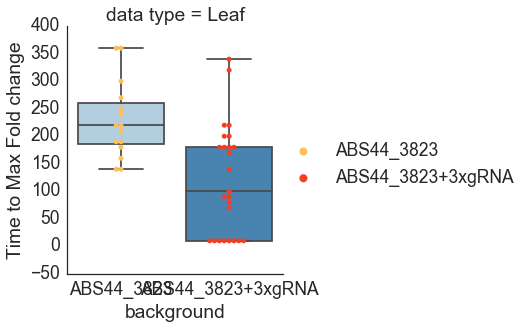

In [16]:
# plot_timecourses(data_norm[(data_norm['data type']=='Leaf')&((data_norm['genotype']=='ABS44_3823')|(data_norm['genotype']=='ABS44_3823+3xgRNA'))])
# plot_line_analysis(analysis[(analysis['data type']=='Leaf')&((analysis['genotype']=='ABS44_3823')|(analysis['genotype']=='ABS44_3823+3xgRNA'))])
# plot_timecourses(data_norm[(data_norm['data type']=='Whole plant')&((data_norm['genotype']=='ABS44_3823')|(data_norm['genotype']=='ABS44_3823+3xgRNA'))])
# plot_line_analysis(analysis[(analysis['data type']=='Whole plant')&((analysis['genotype']=='ABS44_3823')|(analysis['genotype']=='ABS44_3823+3xgRNA'))])

# #3823_3xgRNA area_label 50 looks wierd in that it is not really responding and has low signal so I am goign to take it out: <- does not really have much effect
# plot_timecourses(data_norm[(data_norm['data type']=='Leaf')&(data_norm['area_label']!=46)&((data_norm['genotype']=='ABS44_3823')|(data_norm['genotype']=='ABS44_3823+3xgRNA'))])
# plot_line_analysis(analysis[(analysis['data type']=='Leaf')&(analysis['area_label']!=46)&((analysis['genotype']=='ABS44_3823')|(analysis['genotype']=='ABS44_3823+3xgRNA'))])

data_to_plot = data_norm[((data_norm['genotype']=='ABS44_3823')|(data_norm['genotype']=='ABS44_3823+3xgRNA'))&(data_norm['data type']=='Whole plant')]

# fig1 = plot_timecourses_for_fig(data_to_plot)
# fig1.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_3xgRNA_adult_timcourses_whole_plant.svg')

data_to_plot = analysis[((analysis['genotype']=='ABS44_3823')|(analysis['genotype']=='ABS44_3823+3xgRNA'))&(analysis['data type']=='Leaf')]
data_to_plot['background'] = data_to_plot['genotype']

fig2,fig3= plot_line_analysis(data_to_plot)
fig2.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_3xgRNA_adult_max_fold_change_leaf_grouped.svg')
# fig3.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_3xgRNA_adult_max_fold_change_whole_plant.svg')
# plot_line_analysis(analysis_ABS44.append(analysis[(analysis['genotype']=='ABS44_3823+3xgRNA')]))

anova = scipy.stats.f_oneway(data_to_plot[data_to_plot['background']=='ABS44_3823+3xgRNA']['Max percent change post induction'],data_to_plot[data_to_plot['background']=='ABS44_3823']['Max percent change post induction'])
print('Max percent change post induction: ' + str(anova))
anova = scipy.stats.f_oneway(data_to_plot[data_to_plot['background']=='ABS44_3823+3xgRNA']['Time to Max Fold change'],data_to_plot[data_to_plot['background']=='ABS44_3823']['Time to Max Fold change'])
print('Time to Max Fold change: ' + str(anova))

print('Median Max percent change post induction ABS44: ' + str(numpy.median(data_to_plot[data_to_plot['background']=='ABS44_3823']['Max percent change post induction'])))
print('Median Max percent change post induction ABS44+3xgRNA: ' + str(numpy.median(data_to_plot[data_to_plot['background']=='ABS44_3823+3xgRNA']['Max percent change post induction'])))



In [5]:
# fig3 = plot_timecourses_for_fig(data_norm[(data_norm['genotype']=='ABS44_3823')|(data_norm['genotype']=='ABS44_3811')|(data_norm['genotype']=='ABS44_3810')|(data_norm['genotype']=='ABS44_4018')|(data_norm['genotype']=='ABS44_3823')|(data_norm['genotype']=='ABS44_4015')])
# fig1, fig2 = plot_line_analysis(analysis[(analysis['genotype']=='ABS44_3823')|(analysis['genotype']=='ABS44_3811')|(analysis['genotype']=='ABS44_3810')|(analysis['genotype']=='ABS44_4018')|(analysis['genotype']=='ABS44_3823')|(analysis['genotype']=='ABS44_4015')])

data_ABS44 = data_norm[(data_norm['genotype']=='ABS44_3823')|(data_norm['genotype']=='ABS44_3811')|(data_norm['genotype']=='ABS44_3810')|(data_norm['genotype']=='ABS44_4018')|(data_norm['genotype']=='ABS44_3823')|(data_norm['genotype']=='ABS44_4015')]
data_ABS44['background'] = ['ABS44']*len(data_ABS44)
analysis_ABS44 = analysis[(analysis['genotype']=='ABS44_3823')|(analysis['genotype']=='ABS44_3811')|(analysis['genotype']=='ABS44_3810')|(analysis['genotype']=='ABS44_4018')|(analysis['genotype']=='ABS44_3823')|(analysis['genotype']=='ABS44_4015')]
analysis_ABS44['background'] = ['ABS44']*len(analysis_ABS44)


# fig3.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Different_ABS44_variants_adult_timecourses.svg')
# fig2.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Different_ABS44_variants_adult_time_to_max_fold_change.svg')
# fig1.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Different_ABS44_variants_adult_max_fold_change.svg')

C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


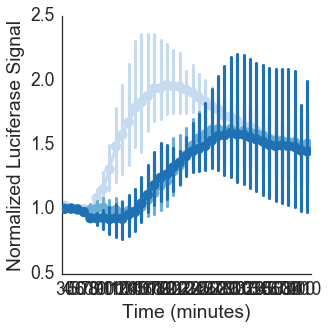

In [211]:
# plot_timecourses(data_norm[(data_norm['genotype']=='ABS44_4015')|(data_norm['genotype']=='ABS46_3807')|(data_norm['genotype']=='ABS46_4130')|(data_norm['genotype']=='ABS46_4145')])
# plot_line_analysis(analysis[(analysis['genotype']=='ABS44_4015')|(analysis['genotype']=='ABS46_3807')|(analysis['genotype']=='ABS46_4130')|(analysis['genotype']=='ABS46_4145')])

data_ABS46 = data_norm[(data_norm['genotype']=='ABS46_3807')|(data_norm['genotype']=='ABS46_4130')|(data_norm['genotype']=='ABS46_4145')]
# data_ABS46['genotype'] = ['ABS46']*len(data_ABS46)
analysis_ABS46 = analysis[(analysis['genotype']=='ABS46_3807')|(analysis['genotype']=='ABS46_4130')|(analysis['genotype']=='ABS46_4145')]
# analysis_ABS46['genotype'] = ['ABS46']*len(analysis_ABS46)

# plot_line_analysis_violin(analysis_ABS44.append(analysis_ABS46))

fig1 = plot_timecourses_for_fig(data_ABS46[data_ABS46['data type']=='Whole plant'])
fig1.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Repression_domain_variant_adult_timcourses_whole_plant.svg')

# data_to_plot = analysis_ABS44.append(analysis_ABS46)
# data_to_plot = data_to_plot[data_to_plot['data type']=='Whole plant']

# fig2,fig3 = plot_line_analysis(data_to_plot)
# fig2.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Repression_domain_variant_adult_max_percent_change_whole_plant.svg')
# fig3.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Repression_domain_variant_adult_time_to_max_percent_change_whole_plant.svg')



C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Max percent change post induction: F_onewayResult(statistic=38.031442589529519, pvalue=1.0058758674458329e-08)
Time to Max Fold change: F_onewayResult(statistic=4.5015138262800241, pvalue=0.035956786485372094)
Median Time to Max Fold change ABS49: 220.0
Median Time to Max Fold change ABS44: 190.0


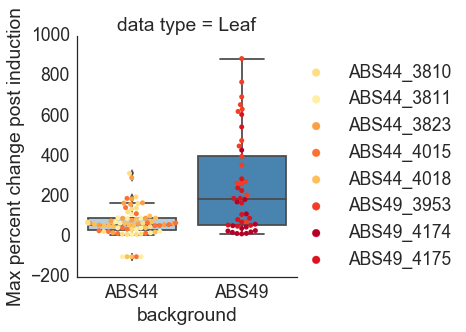

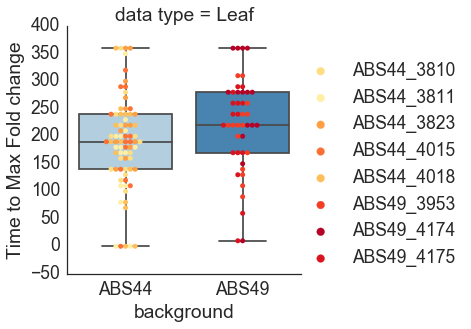

In [15]:
# plot_timecourses(data_norm[(data_norm['genotype']=='ABS44_4015')|(data_norm['genotype']=='ABS49_3953')|(data_norm['genotype']=='ABS49_4175')|(data_norm['genotype']=='ABS49_4174')])
# plot_line_analysis(analysis[(analysis['genotype']=='ABS44_4015')|(analysis['genotype']=='ABS49_3953')|(analysis['genotype']=='ABS49_4175')|(analysis['genotype']=='ABS49_4174')])

data_ABS49 = data_norm[(data_norm['genotype']=='ABS49_3953')|(data_norm['genotype']=='ABS49_4175')|(data_norm['genotype']=='ABS49_4174')]
data_ABS49['background'] = ['ABS49']*len(data_ABS49)
analysis_ABS49 = analysis[(analysis['genotype']=='ABS49_3953')|(analysis['genotype']=='ABS49_4175')|(analysis['genotype']=='ABS49_4174')]
analysis_ABS49['background'] = ['ABS49']*len(analysis_ABS49)

# plot_line_analysis_violin(analysis_ABS44.append(analysis_ABS49))


# fig1 = plot_timecourses_for_fig(data_ABS49[data_ABS49['data type']=='Whole plant'])
# fig1.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Rate_Variant_Degron_adult_timcourses_whole_plant.svg')

data_to_plot = analysis_ABS44.append(analysis_ABS49)
data_to_plot = data_to_plot[data_to_plot['data type']=='Leaf']

fig2,fig3 = plot_line_analysis(data_to_plot)
# fig2.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Rate_Variant_Degron_adult_max_percent_change_whole_plant.svg')
fig3.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_Rate_Variant_Degron_adult_time_to_max_percent_change_grouped_leaf.svg')

anova = scipy.stats.f_oneway(data_to_plot[data_to_plot['background']=='ABS49']['Max percent change post induction'],data_to_plot[data_to_plot['background']=='ABS44']['Max percent change post induction'])
print('Max percent change post induction: ' + str(anova))
anova = scipy.stats.f_oneway(data_to_plot[data_to_plot['background']=='ABS49']['Time to Max Fold change'],data_to_plot[data_to_plot['background']=='ABS44']['Time to Max Fold change'])
print('Time to Max Fold change: ' + str(anova))

print('Median Time to Max Fold change ABS49: ' + str(numpy.median(data_to_plot[data_to_plot['background']=='ABS49']['Time to Max Fold change'])))
print('Median Time to Max Fold change ABS44: ' + str(numpy.median(data_to_plot[data_to_plot['background']=='ABS44']['Time to Max Fold change'])))

#seeing what the raw data looks like comparitively
# path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170709_ABS48 49_Andrew_collected.xlsx'
# num_area_labels = 54
# read_time_step = 10
# num_time_points = 42
# g = ['ABS48_4137']*15 + ['ABS49_3953']*15 + ['ABS49_4175']*15 + ['ABS48_4137']*3 + ['ABS49_3953']*3 + ['ABS49_4175']*3 
# line = [3]*5 + [2]*5 + [1]*5 + [4]*5 + [5]*5 + [3]*5 + [5]*5 + [1]*5 + [2]*5 + [3,2,1,4,5,3,5,1,2]
# data_type = ['Leaf']*45 + ['Whole plant']*9

# data1 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)

# path = '/Users/arjun/Google Drive/HDCTF/Data/Luciferase_Timecourses/170712_ABS44 vars_Andrew_collected.xlsx'
# num_area_labels = 54
# read_time_step = 10
# num_time_points = 42
# g = ['ABS44_4018']*15 + ['ABS44_3823']*15 + ['ABS44_4015']*15 + ['ABS44_4018']*3 + ['ABS44_3823']*3 + ['ABS44_4015']*3 
# line = [3]*5 + [2]*5 + [4]*5 + [4]*5 + [2]*5 + [3]*5 + [2]*5 + [1]*5 + [4]*5 + [3,2,4,4,2,3,2,1,4]
# data_type = ['Leaf']*45 + ['Whole plant']*9

# data2 = get_data_and_annotate(path,num_area_labels,read_time_step,num_time_points,g,line,data_type)

# data = data1.append(data2)
# plot_timecourses(data[(data['genotype']=='ABS49_3953')|(data['genotype']=='ABS44_4015')])



C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\arjun\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Max percent change post induction: F_onewayResult(statistic=1.9225435563601068, pvalue=0.16819060478820685)
Time to Max Fold change: F_onewayResult(statistic=0.66939215520914686, pvalue=0.4149127153210358)


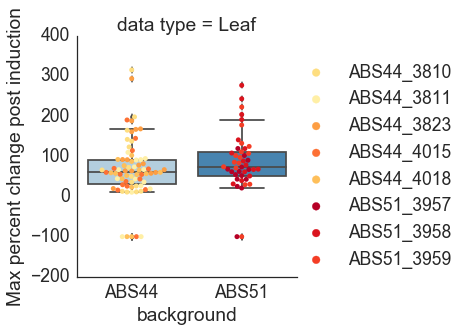

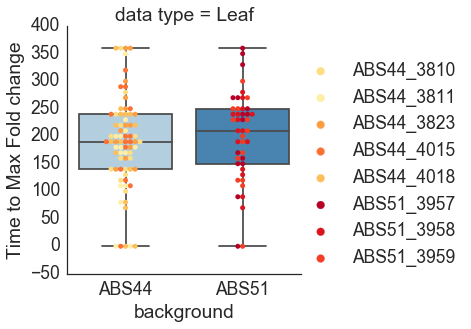

In [6]:
# plot_timecourses(data_norm[(data_norm['genotype']=='ABS44_4015')|(data_norm['genotype']=='ABS51_3959')|(data_norm['genotype']=='ABS51_3958')|(data_norm['genotype']=='ABS51_3957')])
# plot_line_analysis(analysis[(analysis['genotype']=='ABS44_4015')|(analysis['genotype']=='ABS51_3959')|(analysis['genotype']=='ABS51_3958')|(analysis['genotype']=='ABS51_3957')])

data_ABS51 = data_norm[(data_norm['genotype']=='ABS51_3959')|(data_norm['genotype']=='ABS51_3958')|(data_norm['genotype']=='ABS51_3957')]
data_ABS51['background'] = ['ABS51']*len(data_ABS51)
analysis_ABS51 = analysis[(analysis['genotype']=='ABS51_3959')|(analysis['genotype']=='ABS51_3958')|(analysis['genotype']=='ABS51_3957')]
analysis_ABS51['background'] = ['ABS51']*len(analysis_ABS51)

# plot_line_analysis_violin(analysis_ABS44.append(analysis_ABS51))

data_to_plot = analysis_ABS44.append(analysis_ABS51)
data_to_plot = data_to_plot[data_to_plot['data type']=='Leaf']



# fig1 = plot_timecourses_for_fig(data_ABS51[data_ABS51['data type']=='Whole plant'])
# fig1.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_3xdegron_adult_timcourses_whole_plant.svg')


fig2,fig3 = plot_line_analysis(data_to_plot)
# fig2.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_3xdegron_adult_max_percent_change_whole_plant.svg')
# fig3.savefig('/Users/arjun/Google Drive/HDCTF/Figures/170717_3xdegron_adult_time_to_max_percent_change_whole_plant.svg')

anova = scipy.stats.f_oneway(data_to_plot[data_to_plot['background']=='ABS51']['Max percent change post induction'],data_to_plot[data_to_plot['background']=='ABS44']['Max percent change post induction'])
print('Max percent change post induction: ' + str(anova))
anova = scipy.stats.f_oneway(data_to_plot[data_to_plot['background']=='ABS51']['Time to Max Fold change'],data_to_plot[data_to_plot['background']=='ABS44']['Time to Max Fold change'])
print('Time to Max Fold change: ' + str(anova))